In [81]:
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)
cf.go_offline()

In [2]:
df = pd.read_excel("flight_price.xlsx")

## Data Cleaning

In [3]:
data = df.copy()

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.shape

(10683, 11)

In [6]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [8]:
data.shape

(10683, 9)

In [9]:
#convert dateof jurney in to datetime
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])

In [10]:
# saprate day/month/year from this
data["Day"] = data["Date_of_Journey"].dt.day
data["Month"] = data["Date_of_Journey"].dt.month
data["Year"] = data["Date_of_Journey"].dt.year

In [11]:
# drop dateofjurny colum as we extract day/months/year
data.drop("Date_of_Journey",axis=1,inplace=True)

In [12]:
data.drop("Year",axis=1,inplace=True)

In [13]:
# extract hour and minutes from deptime
data["Dep_hour"] = data["Dep_Time"].apply(lambda x:x.split(":")).str[0].astype(int)
data["Dep_minute"] = data["Dep_Time"].apply(lambda x:x.split(":")).str[1].astype(int)

In [14]:
# drop deptime form data 
data.drop("Dep_Time",axis=1,inplace=True)

In [15]:
# fatch hour and min from arivaltime
data["Arrival_Time"] = data["Arrival_Time"].apply(lambda x:x.split(" ")[0])
data["Arrival_hour"] = data["Arrival_Time"].apply(lambda x:x.split(":")[0]).astype(int)
data["Arrival_minute"] = data["Arrival_Time"].apply(lambda x:x.split(":")[1]).astype(int)

In [16]:
# drop arival time 
data.drop("Arrival_Time",axis=1,inplace=True)

In [17]:
# fatch hour and minutes from duration
data["Duration_hours"] = data["Duration"].str.split(" ").str[0].str.split("h").str[0]
data["Duration_minutes"] = data["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [18]:
data[data["Duration_hours"] == "5m"]

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2 stops,17327,3,6,16,50,16,55,5m,NaN


In [19]:
data.drop(6474,axis=0,inplace=True)

In [20]:
# fill nana value with 0
data["Duration_minutes"] = data["Duration_minutes"].fillna(0)

In [21]:
# convert in to integer
data["Duration_hours"] = pd.to_numeric(data["Duration_hours"])
data["Duration_minutes"] = pd.to_numeric(data["Duration_minutes"])

In [22]:
data.drop("Duration",axis=1,inplace=True)

In [50]:
# fillna with 1
data["Total_Stops"]=data["Total_Stops"].fillna(1)

In [24]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', 1, '4 stops'],
      dtype=object)

In [25]:
data["Total_Stops"] = data["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [26]:
data

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40


In [27]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
# Target Guided ordinal encoding
data.groupby("Airline")["Price"].mean().sort_values(ascending=False)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9606.804112
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

In [29]:
## Replacing target guided ordinal encoding
# def replace_airline_with_mean(df):
#     mean_prices = data.groupby('Airline')['Price'].mean().sort_values()
#     data['Airline'] = data['Airline'].apply(lambda x: mean_prices[x])
#     return df

# data = replace_airline_with_mean(data)
# data.head()

In [30]:
one = OneHotEncoder()

In [31]:
one.fit_transform(data[["Airline"]])

<10682x12 sparse matrix of type '<class 'numpy.float64'>'
	with 10682 stored elements in Compressed Sparse Row format>

In [32]:
pd.DataFrame(one.fit_transform(data[["Airline"]]).toarray(),columns=one.get_feature_names())

,x0_Air Asia,x0_Air India,x0_GoAir,x0_IndiGo,x0_Jet Airways,x0_Jet Airways Business,x0_Multiple carriers,x0_Multiple carriers Premium economy,x0_SpiceJet,x0_Trujet,x0_Vistara,x0_Vistara Premium economy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
one.transform([["Air Asia"]]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
data[data.duplicated()]

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
683,Jet Airways,Delhi,Cochin,2.0,13376,6,1,14,35,4,25,13,50
1061,Air India,Delhi,Cochin,2.0,10231,21,5,22,0,19,15,21,15
1348,Air India,Delhi,Cochin,2.0,12392,18,5,17,15,19,15,26,0
1418,Jet Airways,Delhi,Cochin,2.0,10368,6,6,5,30,4,25,22,55
1674,IndiGo,Banglore,New Delhi,0.0,7303,24,3,18,25,21,20,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,2.0,12819,27,6,23,5,12,35,13,30
10616,Jet Airways,Delhi,Cochin,2.0,13014,6,1,9,40,12,35,26,55
10634,Jet Airways,Delhi,Cochin,2.0,11733,6,6,9,40,12,35,26,55
10672,Jet Airways,Delhi,Cochin,2.0,11150,27,6,23,5,19,0,19,55


In [35]:
data.drop_duplicates()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40


## EDA

In [36]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45


In [37]:
data.tail()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2.0,11753,5,9,10,55,19,15,8,20


In [38]:
data.shape

(10682, 13)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Total_Stops       10681 non-null  float64
 4   Price             10682 non-null  int64  
 5   Day               10682 non-null  int64  
 6   Month             10682 non-null  int64  
 7   Dep_hour          10682 non-null  int32  
 8   Dep_minute        10682 non-null  int32  
 9   Arrival_hour      10682 non-null  int32  
 10  Arrival_minute    10682 non-null  int32  
 11  Duration_hours    10682 non-null  int64  
 12  Duration_minutes  10682 non-null  int64  
dtypes: float64(1), int32(4), int64(5), object(3)
memory usage: 1001.4+ KB


In [51]:
data.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Day                 0
Month               0
Dep_hour            0
Dep_minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [52]:
data.describe()

,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824097,9086.292735,12.683112,5.534731,12.490358,24.408819,13.348530,24.687793,10.247051,28.329901
std,0.675135,4610.885695,8.803615,2.987626,5.748819,18.767225,6.859398,16.504203,8.495234,16.944689
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [53]:
catigerocal_features = data.dtypes[data.dtypes == "object"].index

In [54]:
catigerocal_features

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [55]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [56]:
numerical_features

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [57]:
data["Airline"].value_counts(normalize=True)*100

Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64

In [58]:
for i in catigerocal_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("="*60)

Airline Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64
Source Delhi       42.473320
Kolkata     26.876989
Banglore    20.567309
Mumbai       6.515634
Chennai      3.566748
Name: Source, dtype: float64
Destination Cochin       42.473320
Banglore     26.876989
Delhi        11.842352
New Delhi     8.724958
Hyderabad     6.515634
Kolkata       3.566748
Name: Destination, dtype: float64


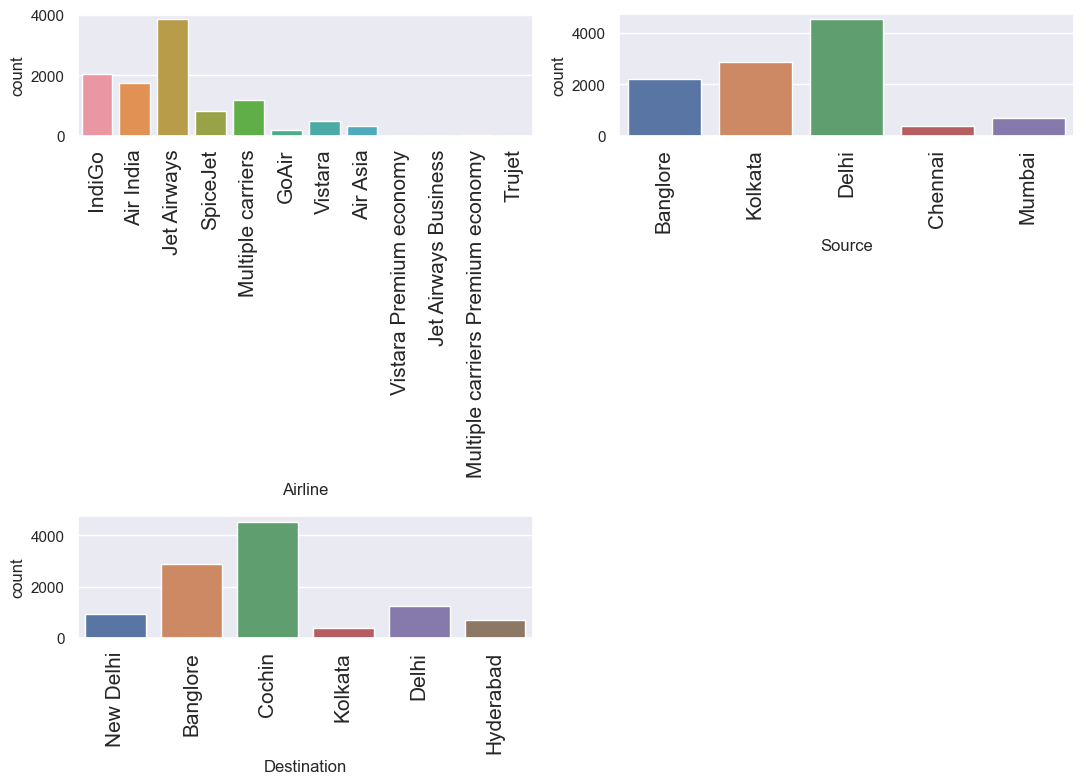

In [59]:
# check the count value of catigorical colum
for i in range(0,len(catigerocal_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[catigerocal_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

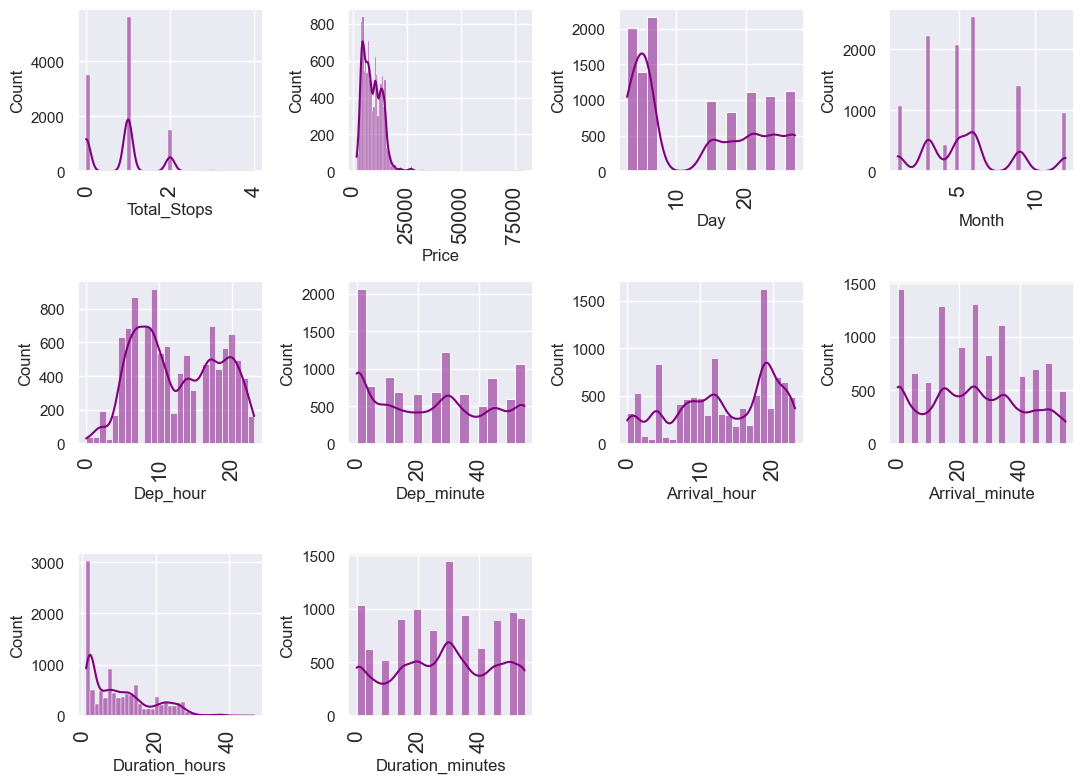

In [61]:
#  chech distribution
for i in range(0,len(numerical_features)):
    plt.subplot(3,4,i+1)    
    sns.histplot(x=data[numerical_features[i]],kde=True,color="purple")
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

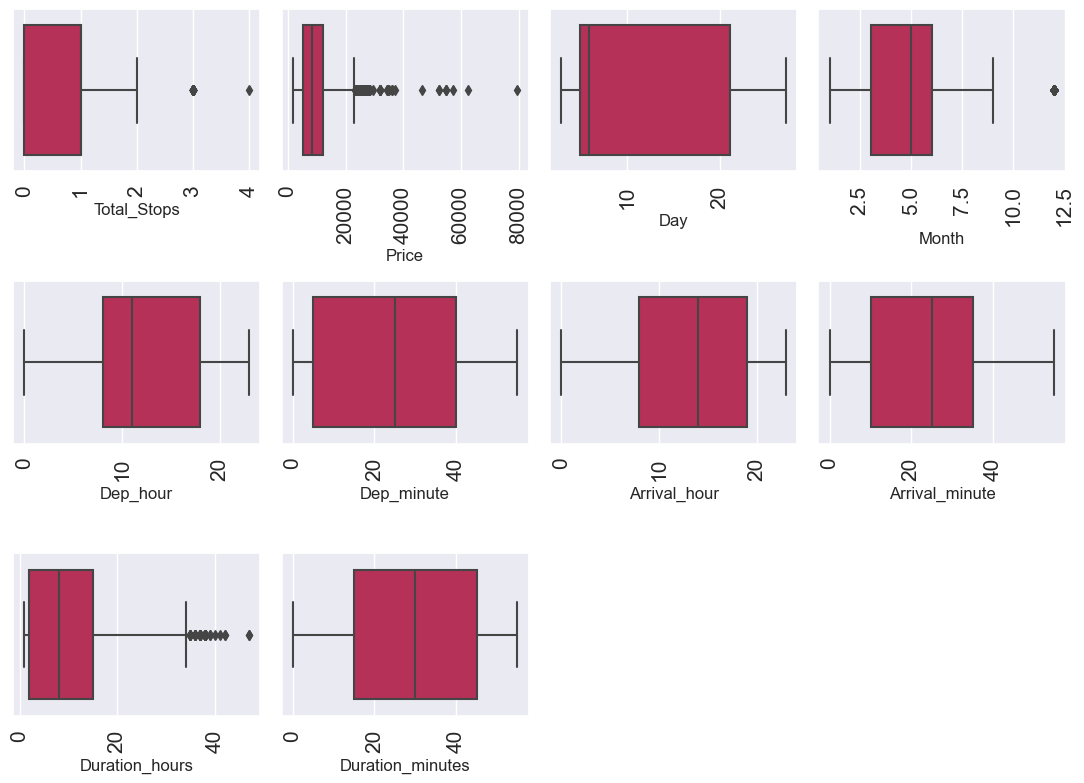

In [119]:
# check outlayers and plot boy plot
for i in range(0,len(numerical_features)):
    plt.subplot(3,4,i+1)    
    sns.boxplot(x=data[numerical_features[i]],palette="rocket")
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

<AxesSubplot:>

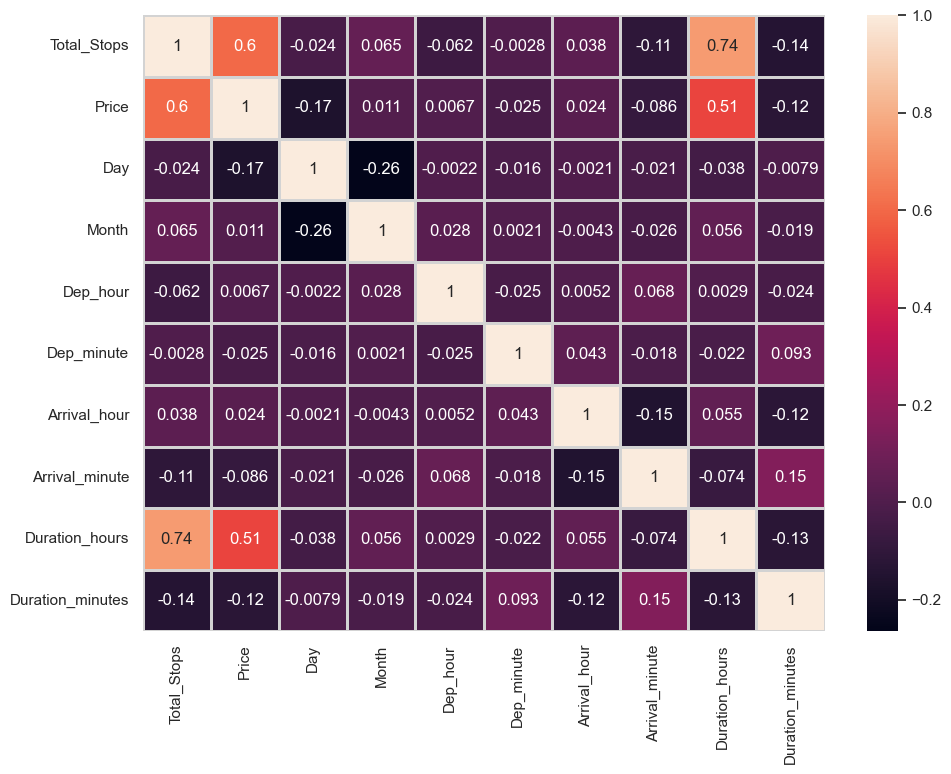

In [70]:
# plot corelation in data
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

In [79]:
# groupprice and arline se which is most expanxive
prices = data.groupby("Airline")["Price"].mean().sort_values(ascending=False).reset_index()

In [80]:
prices

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11643.923357
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9606.804112
5,Vistara Premium economy,8962.333333
6,Vistara,7796.348643
7,GoAir,5861.056701
8,IndiGo,5673.682903
9,Air Asia,5590.260188


<AxesSubplot:xlabel='Price', ylabel='Airline'>

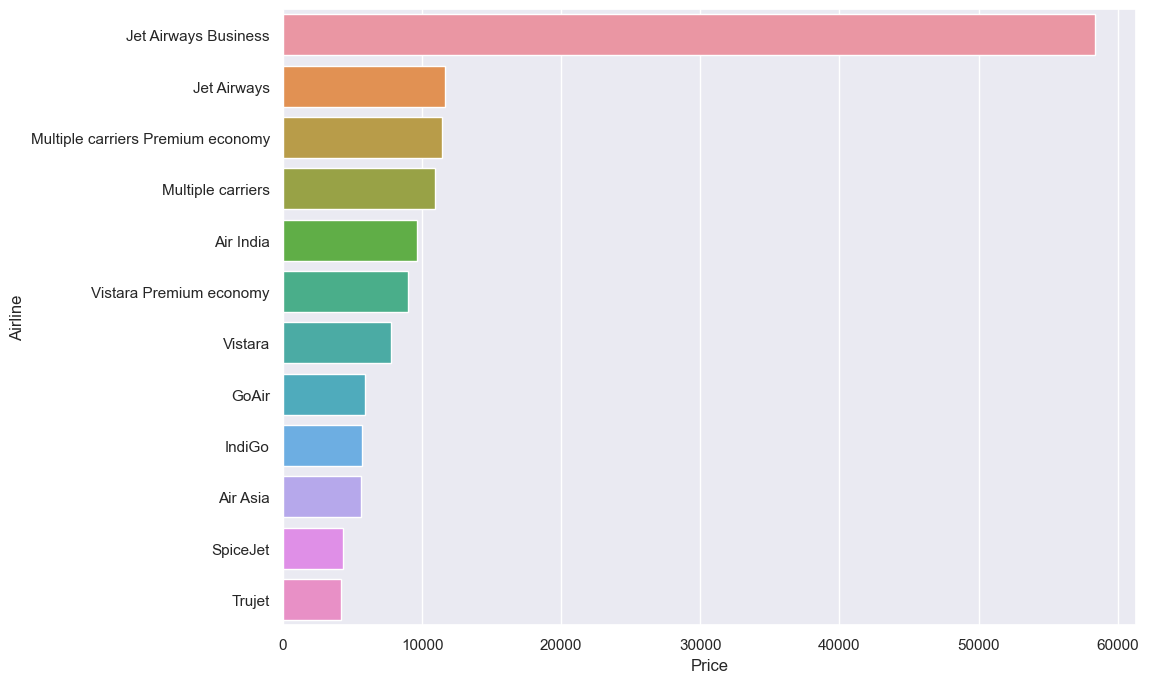

In [82]:
sns.barplot(x="Price",y="Airline",data=prices)

In [84]:
stops = data.groupby("Total_Stops")["Price"].mean().sort_values(ascending=False).reset_index()

In [87]:
stops

,Total_Stops,Price
0,4.0,17686.000000
1,3.0,13112.000000
2,2.0,12712.772219
3,1.0,10593.570032
4,0.0,5024.900315


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

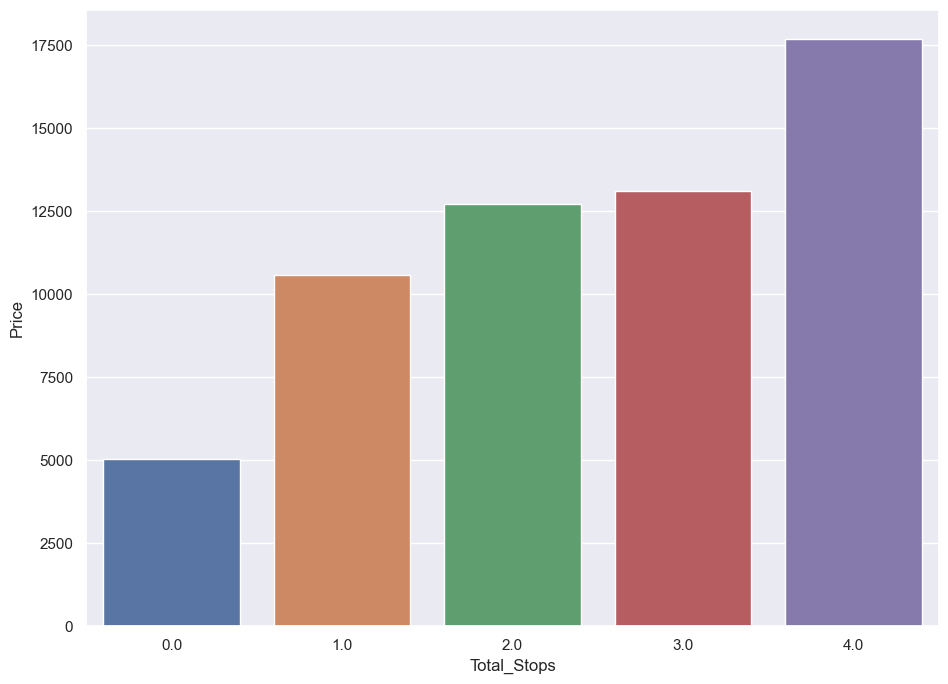

In [90]:
# stops and there prices
sns.barplot(x="Total_Stops",y="Price",data=stops)

In [91]:
data

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40


In [106]:
sources = data.groupby("Source")["Price"].mean().sort_values(ascending=False)

<AxesSubplot:ylabel='Price'>

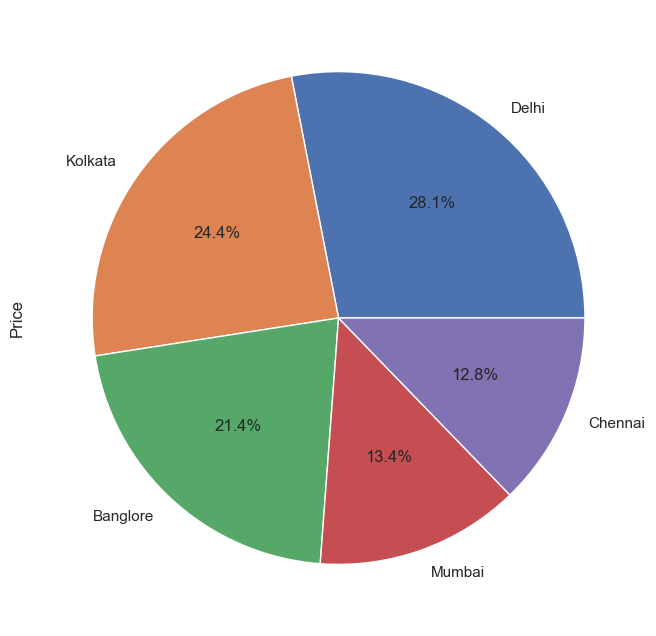

In [108]:
sources.plot.pie(autopct="%1.1f%%")

In [111]:
desti = data.groupby("Destination")["Price"].mean().sort_values(ascending=False).reset_index()

In [112]:
desti

,Destination,Price
0,New Delhi,11917.716738
1,Cochin,10539.439057
2,Banglore,9158.389411
3,Delhi,5143.918577
4,Hyderabad,5042.083333
5,Kolkata,4789.892388


<AxesSubplot:xlabel='Destination', ylabel='Price'>

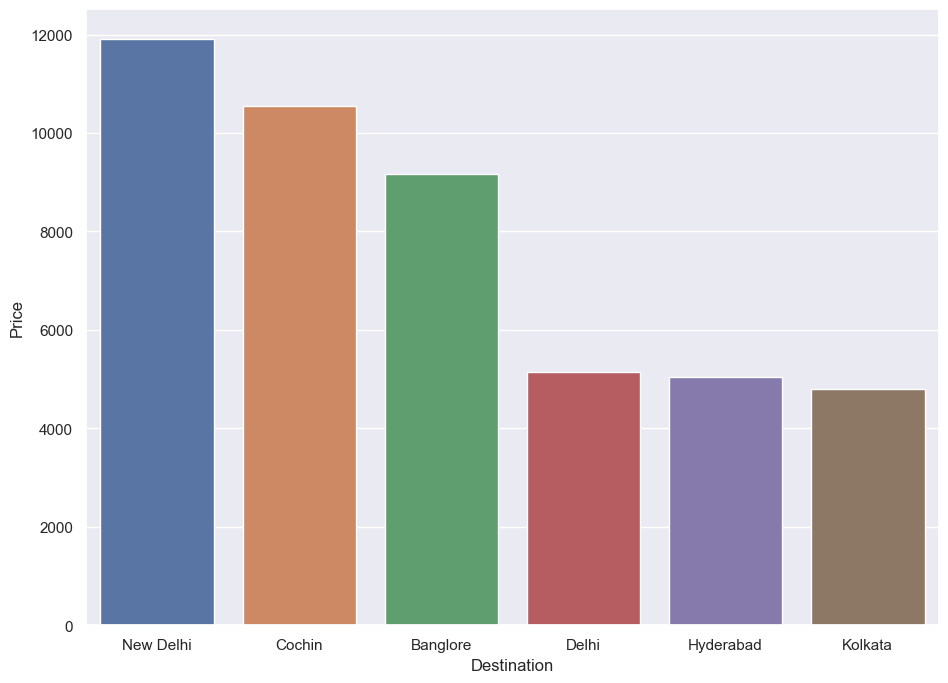

In [114]:
sns.barplot(x="Destination",y="Price",data=desti)

In [121]:
data.groupby(["Destination","Source","Airline"])["Total_Stops"].mean().sort_values(ascending=False).reset_index()

,Destination,Source,Airline,Total_Stops
0,Cochin,Delhi,Jet Airways Business,2.000000
1,Banglore,Kolkata,Air India,1.486328
2,Cochin,Delhi,Air India,1.444444
3,Cochin,Delhi,Jet Airways,1.405422
4,New Delhi,Banglore,Air India,1.240566
5,Cochin,Delhi,Multiple carriers,1.049331
6,Banglore,Kolkata,Jet Airways,1.003185
7,Cochin,Delhi,Multiple carriers Premium economy,1.000000
8,Cochin,Delhi,Air Asia,1.000000
9,Cochin,Delhi,GoAir,1.000000
